In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
import random
from sklearn.neighbors import KDTree

[[ 0.   0.   0.   1.   0.5]
 [ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0. ]
 [ 0.5  0.   0.5  0.   0. ]
 [ 0.   0.5  0.   1.   1. ]]


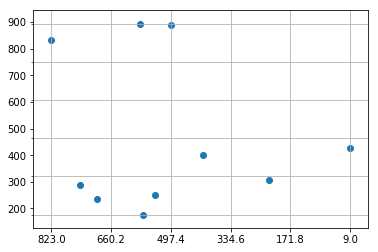

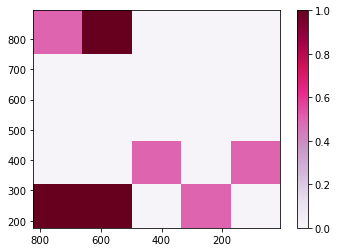

In [2]:
# Test to calculate surface density

# Some fake data points
x0 = np.array([498, 572, 230, 409, 580, 746, 823, 699, 540, 9])
y0 = np.array([887, 177, 306, 402, 894, 288, 831, 235, 251, 426])

# x = random.sample(range(1,1000), 100)
# y = random.sample(range(1,1000), 100)

# Create a 2D histogram that creates evenly-spaced bins and counts the points in each bin
# H is the matrix with the number of points per bin
# xedges, yedges are the bounds of the bins
H, xedges, yedges = np.histogram2d(x0, y0, bins=[5,5], normed=False)
# print(H)
# print('-------')

# Because of the form of the histogram, the matrix doesn't easily overlay onto the scatter plot which makes it hard
# to plot and interpret. Rotating the matrix by 90 degrees fixes this problem.
rotH = np.rot90(H, k=1)
# print(rotH)
# print('-------')
# print(xedges)
# print(yedges)

# Uses the numbers counted in the histogram to calculate a surface density: For each cell, the number of souces
# divided by the area (in this case I made the area == 2 for simplicity).
sd = rotH/2.
print(sd)
# print('-------')

# Scatter plot of points with bin lines drawn
fig, ax = plt.subplots()
ax.set_xticks(xedges, minor=False)
ax.set_yticks(yedges, minor=True)
ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='minor')

plt.scatter(x0,y0)
plt.gca().invert_xaxis()
plt.show()

# color codes bins by surface density with color bar; should make sense when compared to scatter plot
plt.imshow(sd, cmap=plt.cm.PuRd, extent=(xedges[0], xedges[5], yedges[0], yedges[5]))
plt.colorbar(orientation='vertical')
plt.gca().invert_xaxis()
plt.show()

# Playing with only plotting one bin at a time. Not useful now but I don't want to forget it.
# dx = x[np.where((x>=xedges[1]) & (x<=xedges[2]) & (y>=yedges[1]) & (y<=yedges[2]))]
# dy = y[np.where((x>=xedges[1]) & (x<=xedges[2]) & (y>=yedges[1]) & (y<=yedges[2]))]

# plt.scatter(dx,dy)
# plt.show()

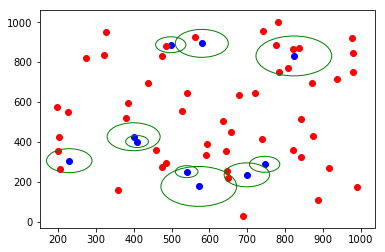

[1 1 2 0 1 0 5 2 0 0]
10


In [3]:
# Test for counting near neighbors

# Fake LRG sources
x0 = np.array([498, 572, 230, 409, 580, 746, 823, 699, 540, 400])
y0 = np.array([887, 177, 306, 402, 894, 288, 831, 235, 251, 426])
# print(x)
# print(y)
r = np.array([40, 100, 60, 30, 70, 40, 100, 60, 30, 70])

# Fake EDR sources
# x1 = random.sample(range(1,1000), 50)
x1 = np.array([977, 721, 198, 594, 990, 841, 199, 873, 206, 888, 740, 541, 476, 780, 561, 359, 837, 690, 381, 742, 820, 648, 485, 273, 808, 486, 776, 327, 677, 644, 459, 979, 385, 820, 592, 527, 635, 657, 646, 227, 842, 916, 322, 870, 937, 204, 784, 978, 439, 475])
# print(x1)
# y1 = random.sample(range(1,1000), 50)
y1 = np.array([920, 646, 575, 389, 175, 515, 355, 430, 262, 110, 413, 647, 272, 999, 928, 161, 870, 30, 518, 954, 362, 218, 293, 819, 771, 883, 888, 950, 633, 354, 360, 847, 595, 867, 334, 556, 505, 449, 254, 552, 323, 269, 834, 695, 715, 425, 751, 750, 693, 830])
# print(y1)

# Plots fake LRG sources and fake EDR sources
plt.scatter(x0,y0, color='blue')
plt.scatter(x1,y1, color='red')

# Draws circle of some radius (50) around the LRG sources
circle = []
for i in range(len(x0)):
    circle = plt.Circle((x0[i],y0[i]), r[i], color='green', fill=False)
    plt.gcf().gca().add_artist(circle)

plt.show()

# Creates a list of ordered pairs; zips ra and dec together so they can be fed into KDTree
# zip_list0 = list(zip(x0, y0))
zip_list0 = list(zip(x0, y0))
zip_list1 = list(zip(x1, y1))
# print(type(zip_list))
# print(zip_list)
# print(zip_list[0])

# Creates a tree of EDR sources
gal_tree = KDTree(zip_list1)

# returns a list of EDR sources that are within some radius of an LRG
nn = gal_tree.query_radius(zip_list0,r=r,count_only=True)
print(nn)
print(len(nn))

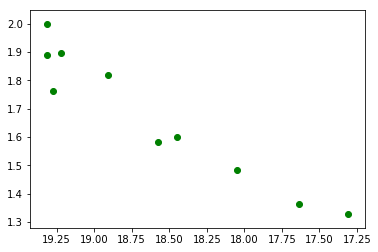

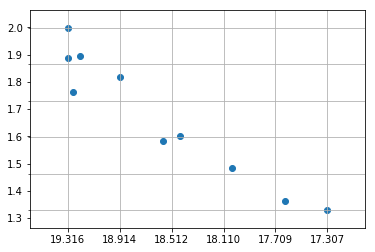

In [4]:
# make mock CMD fake LRG sources

gmag = np.array([18.63490677, 21.03828239, 21.20196533, 20.04792786, 20.15839005, 21.31377983, 20.72852516, 19.53018951, 18.9980735, 21.11632347])
rmag = np.array([17.3069496, 19.2750549, 19.3131599, 18.4473247, 18.57680321, 19.31552124, 18.90965271, 18.04619217, 17.6364421, 19.22134781])

color = gmag - rmag

plt.scatter(rmag, color, color='green')
plt.gca().invert_xaxis()
plt.show()

# find 2D histogram for CMD

H, xedges, yedges = np.histogram2d(rmag, color, bins=[5,5], normed=False)

fig, ax = plt.subplots()
ax.set_xticks(xedges, minor=False)
ax.set_yticks(yedges, minor=True)
ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='minor')

plt.scatter(rmag,color)
plt.gca().invert_xaxis()
plt.show()


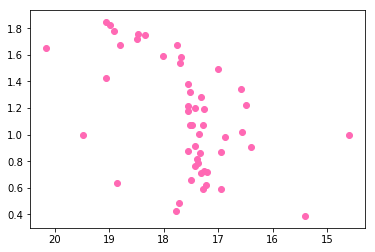

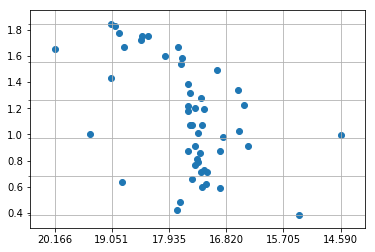

In [5]:
# Fake EDR sources

gmag1 = np.array([18.190702, 17.860029, 18.490376, 19.431778, 21.820837, 20.095238, 18.191208, 17.92448, 18.215328, 18.590332, 18.842909, 18.154316, 20.221233, 15.584373, 19.611717, 18.547148, 17.81884, 18.153547, 18.209368, 18.339615, 18.436972, 18.018217, 20.477499, 15.793666, 17.299936, 17.534184, 17.912783, 18.359669, 18.448116, 17.58688, 18.586212, 20.485641, 17.978889, 18.199383, 17.839111, 19.247328, 20.815678, 18.939732, 18.740555, 17.704433, 20.476809, 18.779524, 18.61795, 19.271307, 18.368336, 20.68718, 20.910795, 19.486134, 20.207657, 17.877981])
rmag1 = np.array([17.426405, 16.87672, 16.996811, 17.761322, 20.165874, 18.343018, 17.33144, 16.584743, 17.72801, 17.518505, 17.522919, 17.491714, 18.46627, 14.589632, 18.01664, 17.477341, 16.946053, 17.36689, 17.393942, 17.425652, 17.560371, 17.308384, 19.477112, 15.405863, 16.391869, 16.942333, 17.196671, 17.284464, 17.256134, 16.564064, 17.306292, 19.058159, 17.25111, 17.773651, 17.220856, 17.708708, 18.989325, 17.556677, 17.559181, 16.480812, 18.805967, 17.561558, 17.418978, 17.68829, 17.360474, 18.909781, 19.064417, 18.852055, 18.490309, 17.283363])

color1 = gmag1 - rmag1

plt.scatter(rmag1, color1, color='hotpink')
plt.gca().invert_xaxis()
plt.show()

# find surface density for CMD

H, xedges, yedges = np.histogram2d(rmag1, color1, bins=[5,5], normed=False)

fig, ax = plt.subplots()
ax.set_xticks(xedges, minor=False)
ax.set_yticks(yedges, minor=True)
ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='minor')

plt.scatter(rmag1,color1)
plt.gca().invert_xaxis()
plt.show()


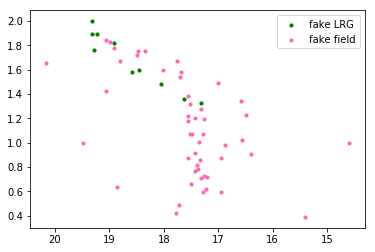

In [6]:
# make CMD with fake LRGs and fake EDR sources on the same plot

plt.scatter(rmag, color, color='green', s=10, label="fake LRG")
plt.scatter(rmag1, color1, color='hotpink', s=10, label="fake field")
plt.gca().invert_xaxis()
plt.legend(loc='upper right')
plt.show()

xedges1= [ 14.   15.4  16.8  18.2  19.6  21. ]
yedges1= [ 0.3   0.64  0.98  1.32  1.66  2.  ]


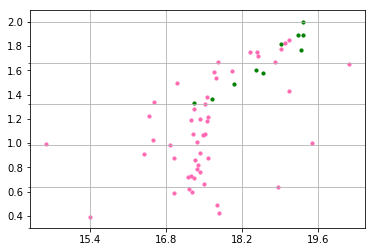

(array([1, 2, 5, 6, 9]),)
(array([0, 7, 8]),)
(array([3, 4]),)


In [25]:
# Create a 2D histogram with defined xedges and yedges

H1, xedges1, yedges1 = np.histogram2d(rmag1, color1, bins=[5,5], range=[[14,21],[0.3,2.0]], normed=False)
rotH1 = np.rot90(H1, k=1)
rotH2 = np.rot90(H1, k=2)
rotH3 = np.rot90(H1, k=3)
rotH4 = np.rot90(H1, k=4)
# print("H1")
# print(H1)
# print("rotated H1") 
# print(rotH1)
# print("rotated H2") 
# print(rotH2)
# print("rotated H3") 
# print(rotH3)
# print("rotated H4") 
# print(rotH4)
print("xedges1=", xedges1)
print("yedges1=", yedges1)
# print("-----")

H, xedges, yedges = np.histogram2d(rmag, color, bins=[5,5], range=[[14,21],[0.3,2.0]], normed=False)
rotH = np.rot90(H, k=1)
# print("H = ", H)
# print("rotated H = ", rotH)
# print("xedges=", xedges)
# print("yedges=", yedges)

fig, ax = plt.subplots()
ax.set_xticks(xedges1, minor=False)
ax.set_yticks(yedges1, minor=True)
ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='minor')

plt.scatter(rmag, color, color='green', s=10, label="fake LRG")
plt.scatter(rmag1, color1, color='hotpink', s=10, label="fake field")
# plt.gca().invert_xaxis()
# plt.legend(loc='upper right')
plt.show()

# index = np.where((rmag >= 18.2) & (rmag <= 19.6) & (color >= 1.66) & (color <= 2.))
index_H = np.where(rotH > 0)
# print(index_H)

index_LRG1 = np.where((rmag >= 18.2) & (rmag <= 19.6) & (color >= 1.66) & (color <= 2.))
index_LRG2 = np.where((rmag >= 16.8) & (rmag <= 18.2) & (color >= 1.32) & (color <= 1.66))
index_LRG3 = np.where((rmag >= 18.2) & (rmag <= 19.6) & (color >= 1.32) & (color <= 1.66))

# print(index_LRG)
# print(len(index_LRG))
print(index_LRG1)
print(index_LRG2)
print(index_LRG3)

# index_nn = index_LRG
# print(index_nn)

# for i in range(len(index_H)):
#     index_LRG = np.where(index_H[i])
#     print(index_LRG)

# print(rotH[0,3])

In [29]:
index_LRG = []

for i in range(len(xedges)-1):  
    for j in range(len(yedges)-1):
        index_LRG.append(np.where((rmag >= xedges[i]) & (rmag <= xedges[i+1]) & (color >= yedges[j]) & (color <= yedges[j+1])))
        
        
print(index_LRG)
print(len(index_LRG))


[(array([], dtype=int64),), (array([], dtype=int64),), (array([], dtype=int64),), (array([], dtype=int64),), (array([], dtype=int64),), (array([], dtype=int64),), (array([], dtype=int64),), (array([], dtype=int64),), (array([], dtype=int64),), (array([], dtype=int64),), (array([], dtype=int64),), (array([], dtype=int64),), (array([], dtype=int64),), (array([0, 7, 8]),), (array([], dtype=int64),), (array([], dtype=int64),), (array([], dtype=int64),), (array([], dtype=int64),), (array([3, 4]),), (array([1, 2, 5, 6, 9]),), (array([], dtype=int64),), (array([], dtype=int64),), (array([], dtype=int64),), (array([], dtype=int64),), (array([], dtype=int64),)]
25


In [18]:
# calculates solid angle subtending projected radius r

omega = []

# omega = np.pi * (r[1]/2.)**2.


for i in range(len(r)):
    ang = np.pi * (r[i]/2.)**2.
    omega.append(ang)

# print(omega)
# print(r[1]) 

Nbkg = []
sd = 0.5

for i in range(len(omega)):
    interlop = sd * omega[i]
    Nbkg.append(interlop)

print(len(Nbkg))
print(Nbkg)

10
[628.31853071795865, 3926.9908169872415, 1413.7166941154069, 353.42917352885172, 1924.2255003237483, 628.31853071795865, 3926.9908169872415, 1413.7166941154069, 353.42917352885172, 1924.2255003237483]


In [19]:
numsats = nn - Nbkg

print(len(numsats))
print(numsats)

10
[ -627.31853072 -3925.99081699 -1411.71669412  -353.42917353 -1923.22550032
  -628.31853072 -3923.99081699 -1411.71669412  -353.42917353 -1923.22550032]
